Importing necessary libraries

In [57]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras .models import Sequential
from keras. layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Creating a class

In [ ]:
class sys():
    def __init__(self,cluster) -> None:
        self.cluster = cluster
        self.data = pd.read_excel('./ANN_Project_data_Groups.xlsx',sheet_name=self.cluster)
        self.data = self.data.to_numpy()
        self.scaler = MinMaxScaler(feature_range=(0,1))
        self.data = self.scaler.fit_transform(self.data[:,0].reshape(-1,1))
        self.train_size = 0.8
        self.seq_size = 5
        self.layers = 2
        self.nodes = [16,10,12,8,4]
        self.actfun = 'relu'

    def train_split(self,train_size=None):
        if train_size == None:
            train_size = self.train_size
        train_index = int(len(self.data)*train_size)
        test_index = len(self.data) - train_size
        self.train,self.test = self.data[0:train_index,:],self.data[train_index:len(self.data),:]

    def to_sequences(self,data):
        # if seq_size == None:
        #     seq_size = self.seq_size
        x = []
        y = []
        for i in range(len(data)-self.seq_size-1):
            x.append(data[i:(i+self.seq_size),0])
            y.append(data[i+self.seq_size,0])
        return np.array(x),np.array(y)

    def ANN(self):
        self.trainX,self.trainY = self.to_sequences(self.train)
        self.testX,self.testY = self.to_sequences(self.test)
        # ANN
        # model = Sequential()
        # model.add(Dense(16,input_dim=self.seq_size,activation='relu'))
        # model.add(Dense(10,activation='relu'))
        # model.add(Dense(1,activation='linear'))
        # model.compile(optimizer='RMSProp',loss="MSE")
        # model.summary()
        model = Sequential()
        # Add hidden layers
        for i in range(self.layers):
            if i == 0:
                # For the first hidden layer
                model.add(Dense(self.nodes[i], input_dim=self.seq_size, activation=self.actfun))
            else:
                model.add(Dense(self.nodes[i], activation=self.actfun))
        # Output layer
        model.add(Dense(1,activation='linear'))
        model.compile(optimizer='RMSProp',loss="MSE")
        # model.summary()

        model.fit(self.trainX,self.trainY,validation_data=(self.testX,self.testY),verbose=0,epochs=100)
        self.trainPredict = model.predict(self.trainX,verbose=0)
        self.testPredict = model.predict(self.testX,verbose=0)

        self.r2_train = r2_score(self.trainY,self.trainPredict)
        self.r2_test = r2_score(self.testY,self.testPredict)
        self.mse_train = mean_squared_error(self.trainY,self.trainPredict)
        self.mse_test = mean_squared_error(self.testY,self.testPredict)

        self.trainPredict = self.scaler.inverse_transform(self.trainPredict)
        self.trainY_inverse = self.scaler.inverse_transform(self.trainY.reshape(-1,1))
        self.testPredict = self.scaler.inverse_transform(self.testPredict)
        self.testY_inverse = self.scaler.inverse_transform(self.testY.reshape(-1,1))

    def printing(self):
        pass
        # print(f"R2 Score for training data: {self.r2_train:.4f}")
        # print(f"R2 Score for testing data: {self.r2_test:.4f}")
        # print(f"Mean Squared Error for training data: {self.mse_train:.4f}")
        print(f"RMSE for testing data: {self.mse_test}")
        
        # print(self.trainPredict.reshape(1,-1))
    def plotting(self):
        time = np.arange(len(self.trainPredict[:,0]))
        # print(time)
        # print(self.trainY.shape,self.trainPredict.shape,time.shape,self.trainPredict,sep='\t')
        # plt.figure(figsize=(20,5))
        # plt.plot(time,self.trainPredict.reshape(-1))
        # plt.scatter(time,self.trainY_inverse.reshape(-1),marker='.',color='red')
        # plt.title(f'Training data Rsquare = {self.r2_train:0.4f}')
        # plt.show()

        time2 = np.arange(len(self.trainPredict[:,0]),len(self.trainPredict[:,0])+len(self.testPredict[:,0]))
        plt.figure(figsize=(20,5))
        plt.plot(time2,self.testPredict.reshape(-1),label='predicted',color='green')
        plt.scatter(time,self.trainY_inverse.reshape(-1),marker='.',color='red')
        plt.scatter(time2,self.testY_inverse.reshape(-1),marker='.',color='red')
        plt.plot(time,self.trainPredict.reshape(-1))
        plt.title(f' RMSE for training data = {self.mse_train}')
        plt.legend()
        plt.show()

    def do_it(self):
        self.train_split()
        self.ANN()
        self.printing()
        self.plotting()

Effect of training size

RMSE for testing data: 5.720088272633786e-05


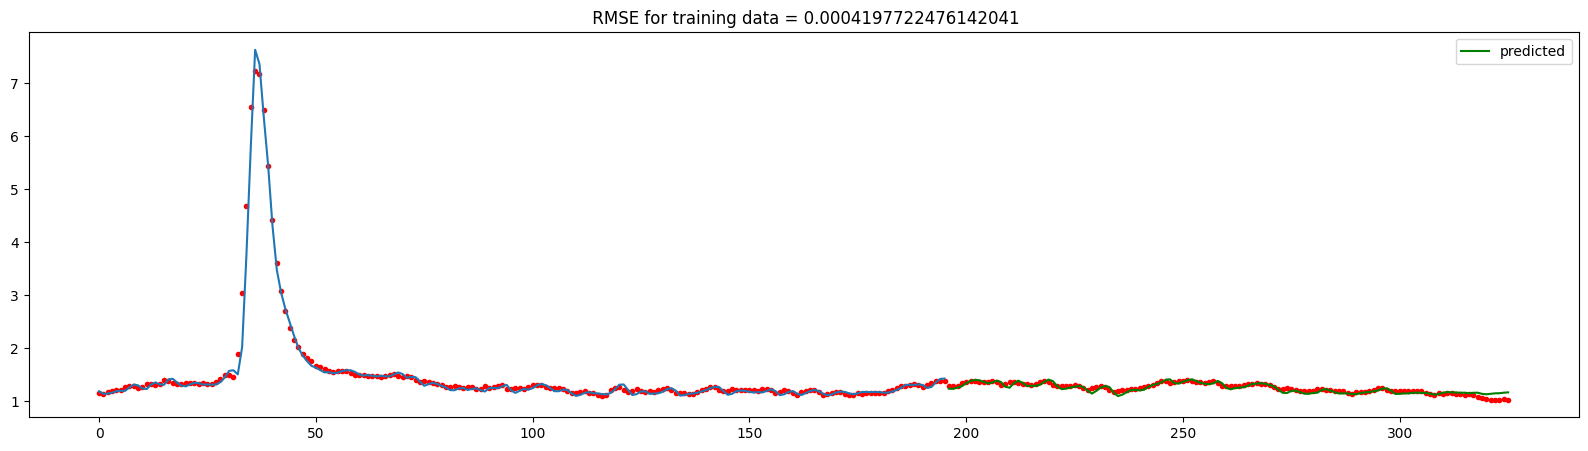

RMSE for testing data: 1.7393816212047983e-05


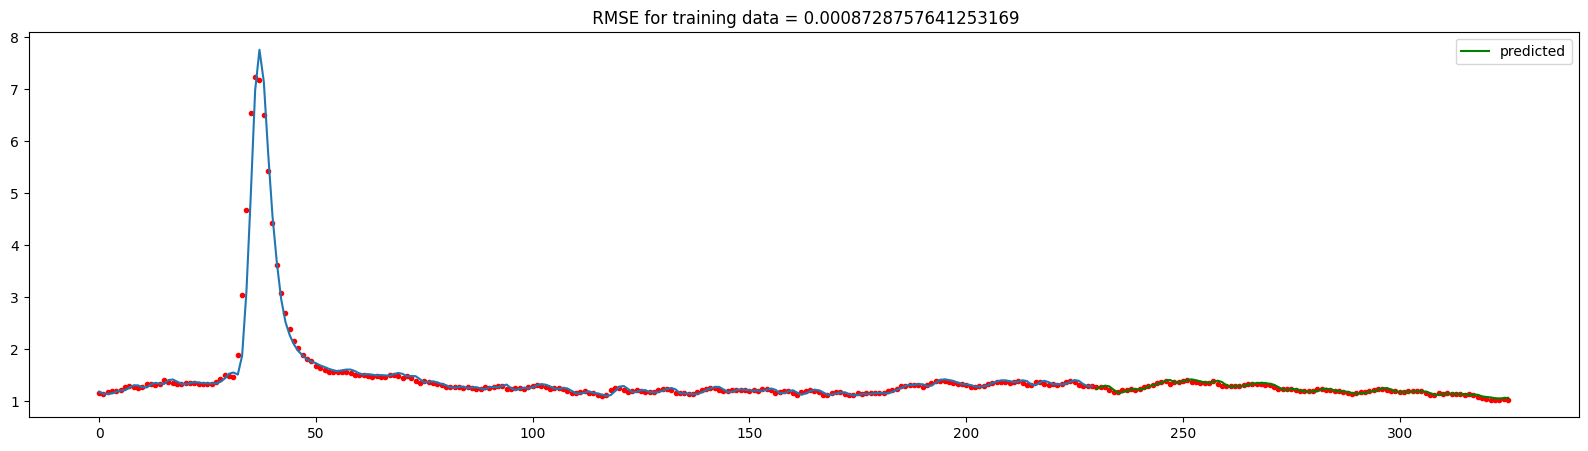

RMSE for testing data: 1.6335438340855325e-05


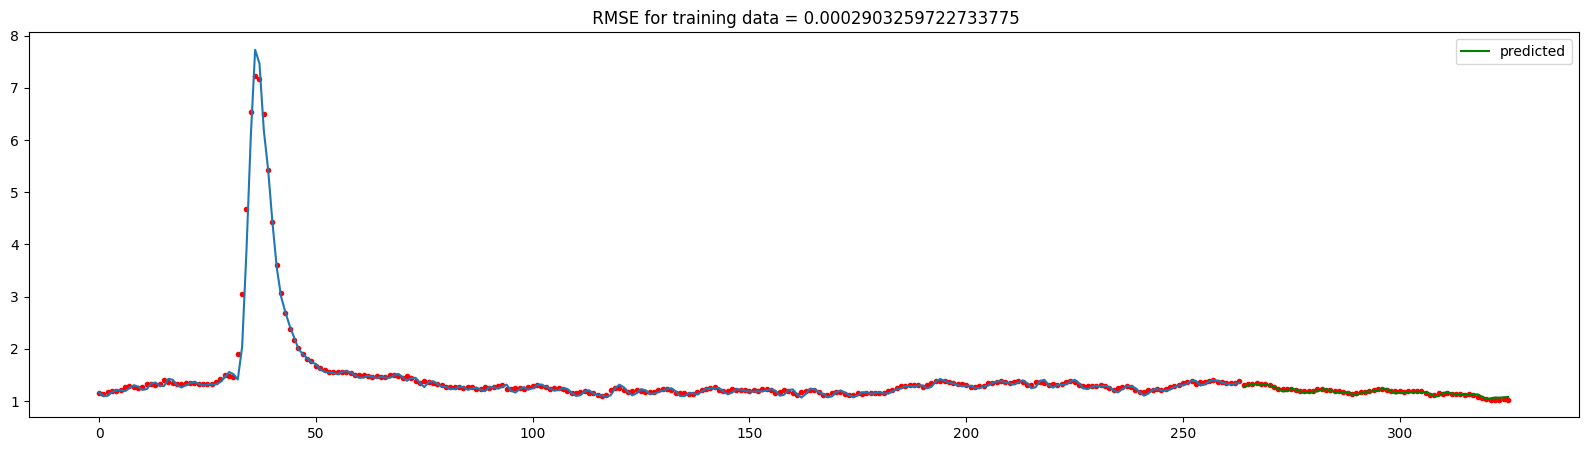

RMSE for testing data: 3.547315678340131e-05


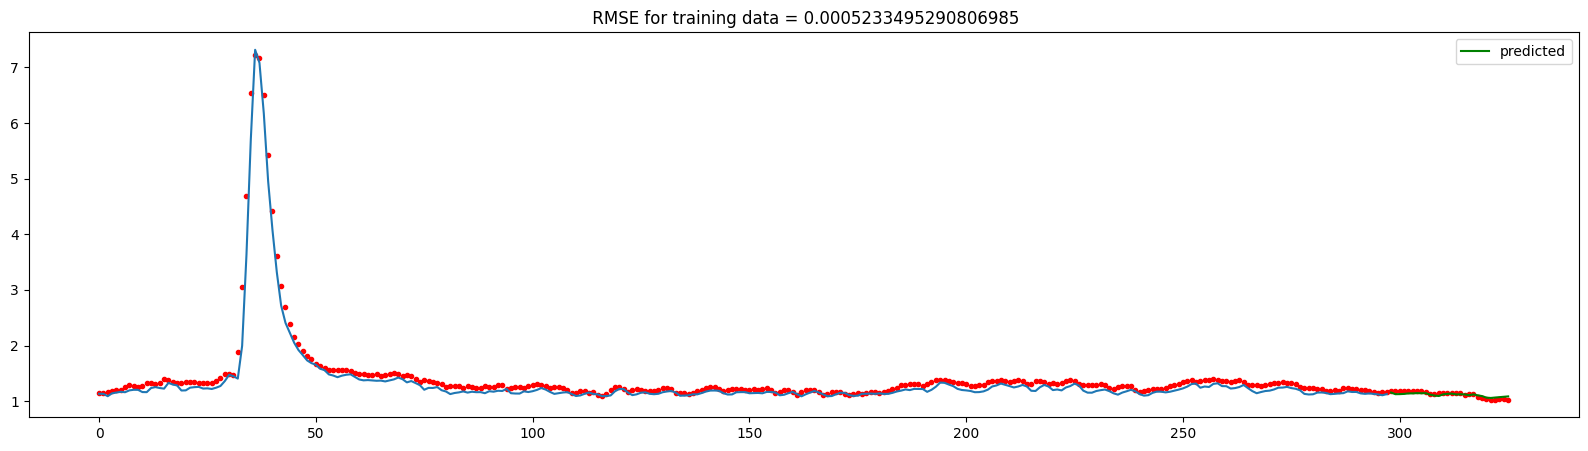

In [58]:
obj1 = sys('cluster7') 

trainers = [0.6,0.7,0.8,0.9] # training size
for i in trainers:
    obj1.train_size = i
    obj1.do_it()

Effect of window size

RMSE for testing data: 4.0607435625455914e-05


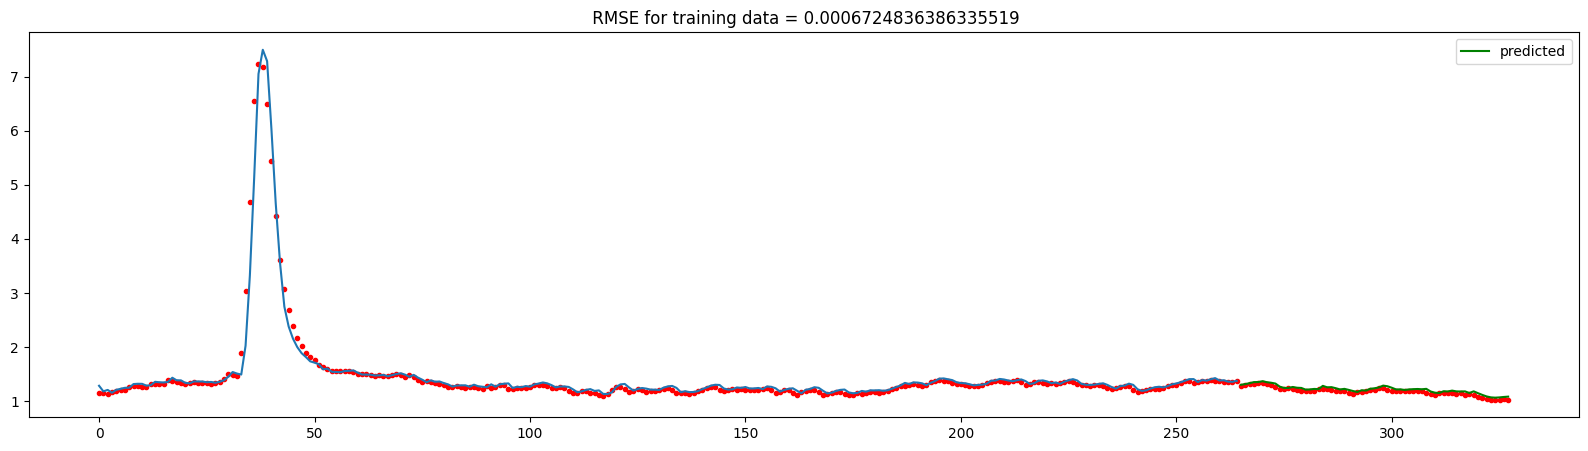

RMSE for testing data: 0.00013468252592190746


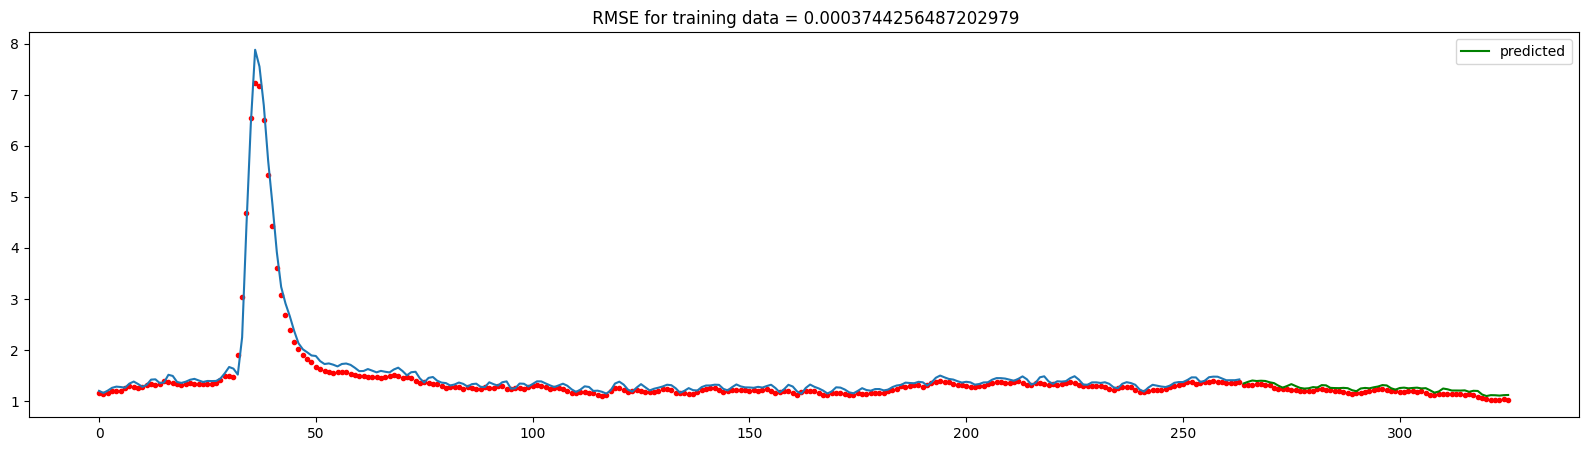

RMSE for testing data: 3.388298514415647e-05


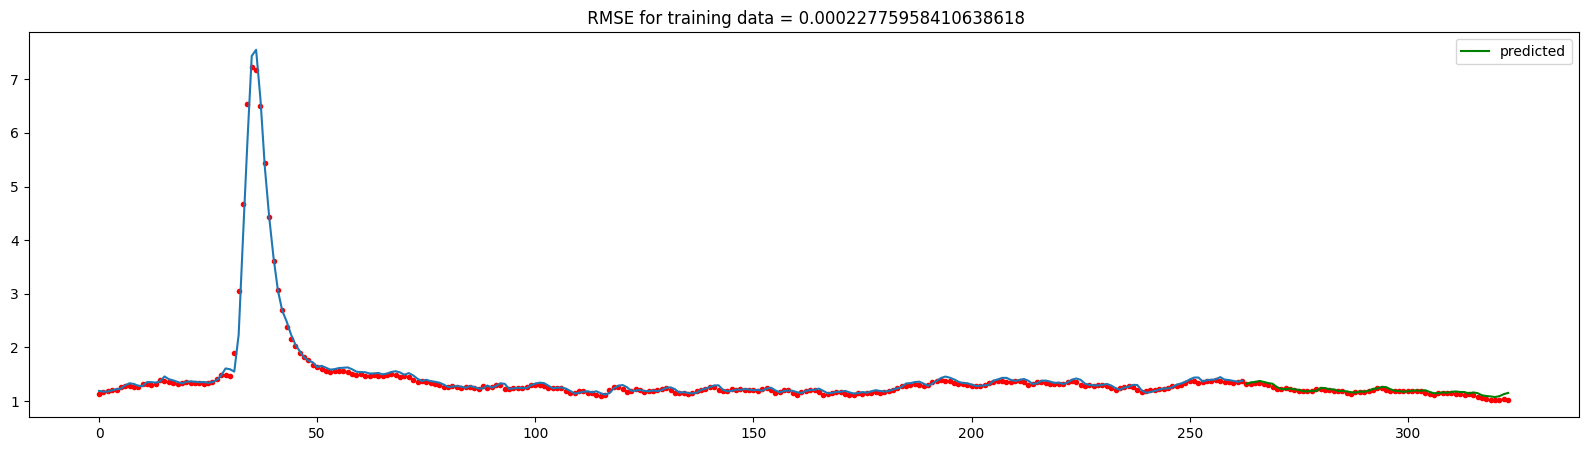

RMSE for testing data: 7.90391530995904e-05


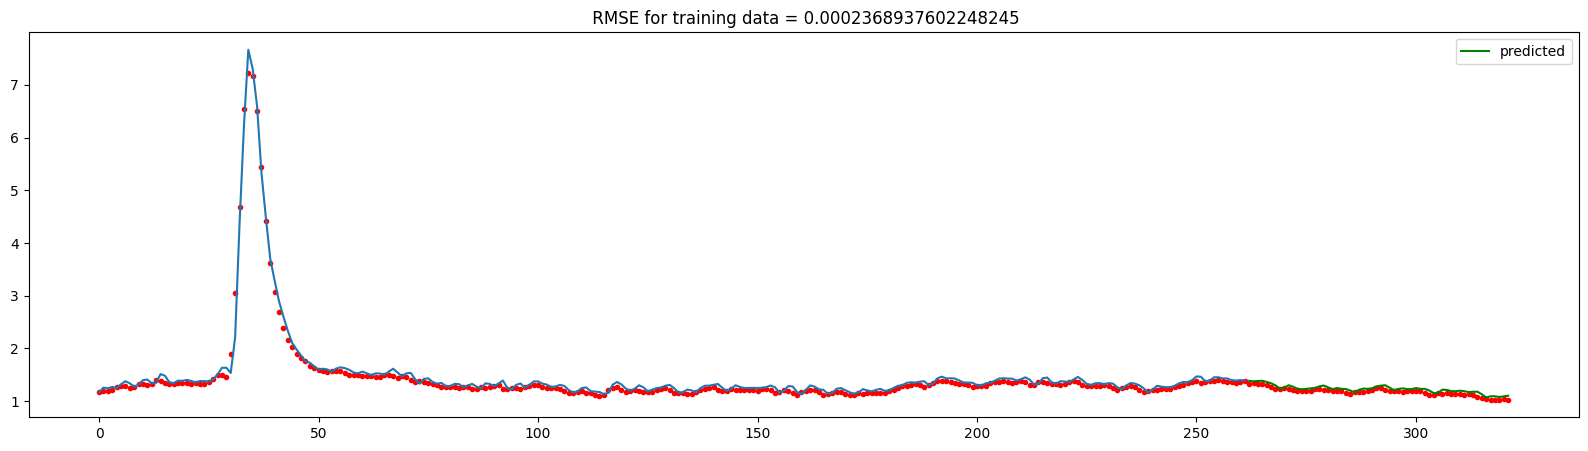

In [59]:
obj1.train_size = 0.8
seq_sizes = [4,5,6,7] # window size
for j in seq_sizes:
    obj1.seq_size = j
    obj1.do_it()

Effect of hidden layers

RMSE for testing data: 3.458676563481673e-05


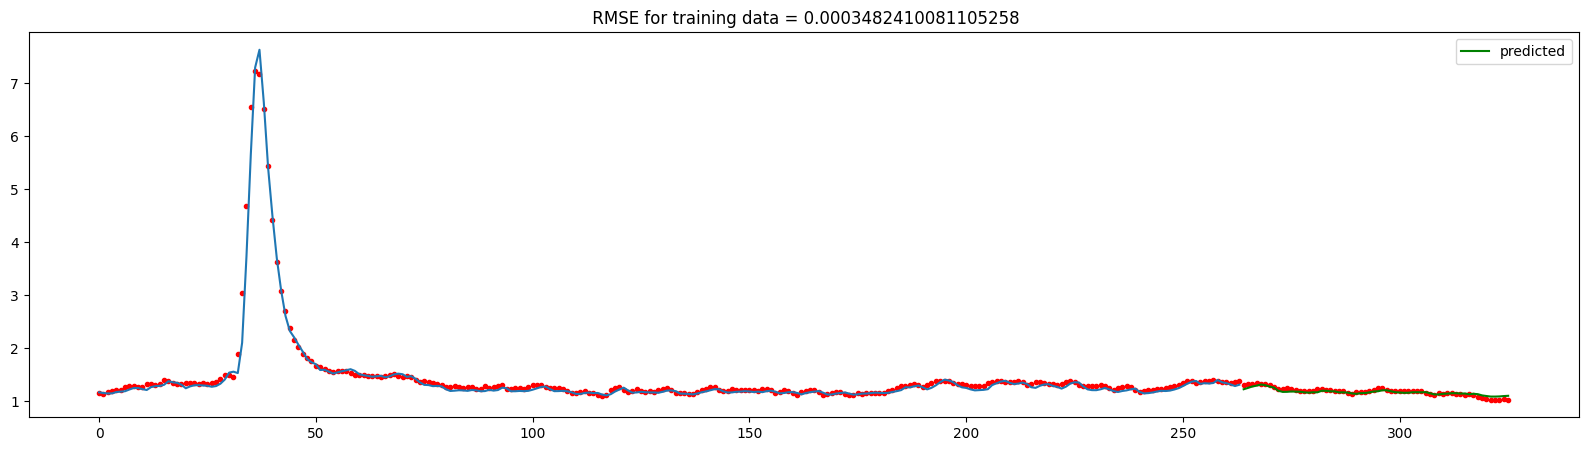

RMSE for testing data: 5.343425215153027e-05


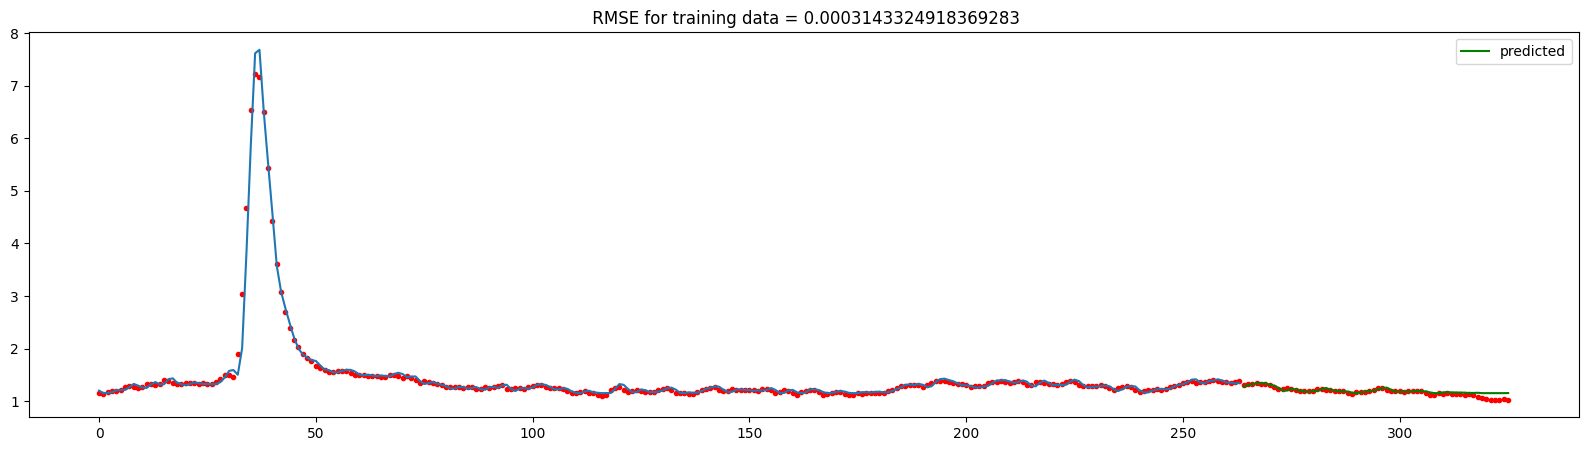

RMSE for testing data: 3.6724974486607235e-05


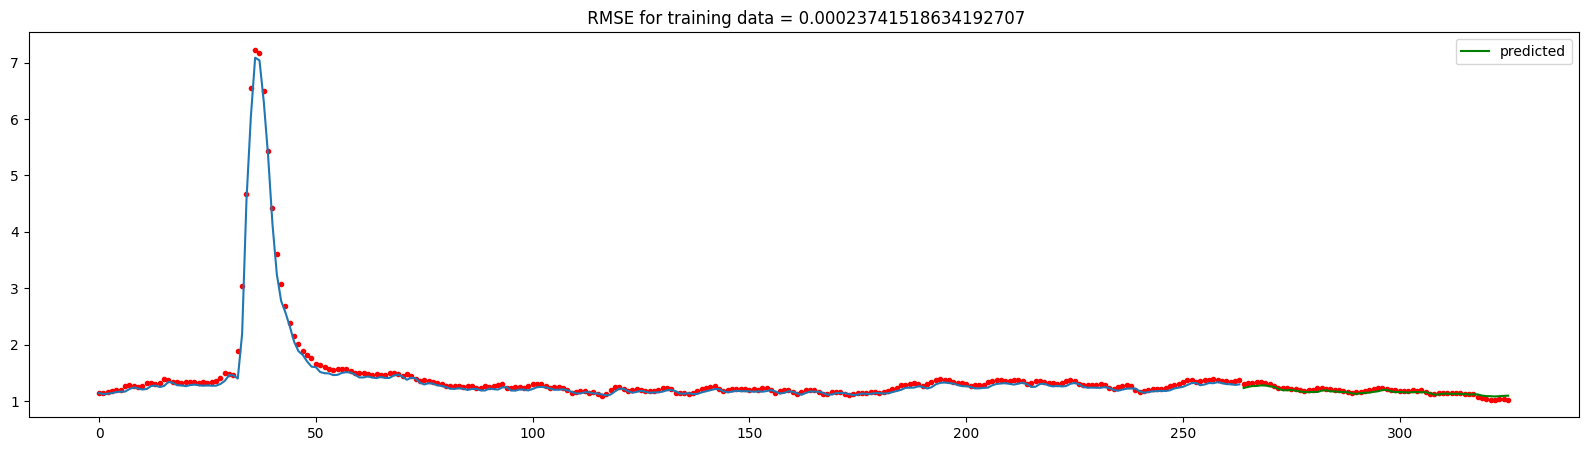

RMSE for testing data: 0.0003110830692898699


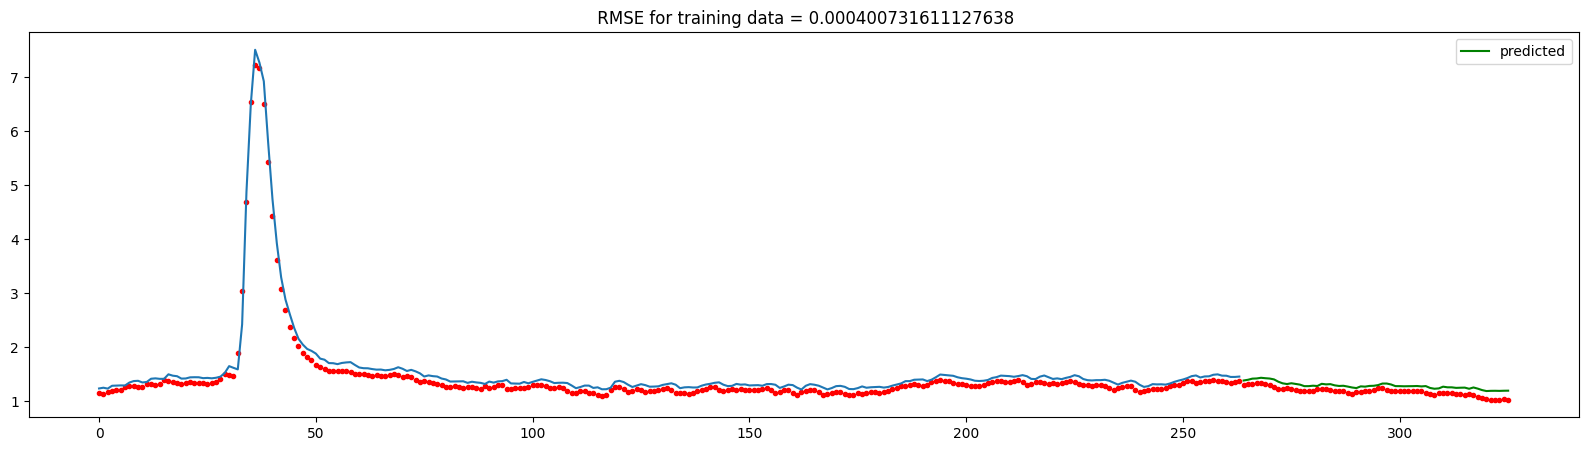

In [60]:
obj1.seq_size = 5
layers = [2,3,4,5] # layers
for s in layers:
    obj1.layers = s
    obj1.do_it()

Effect of Activation Functions

RMSE for testing data: 3.519769161228904e-05


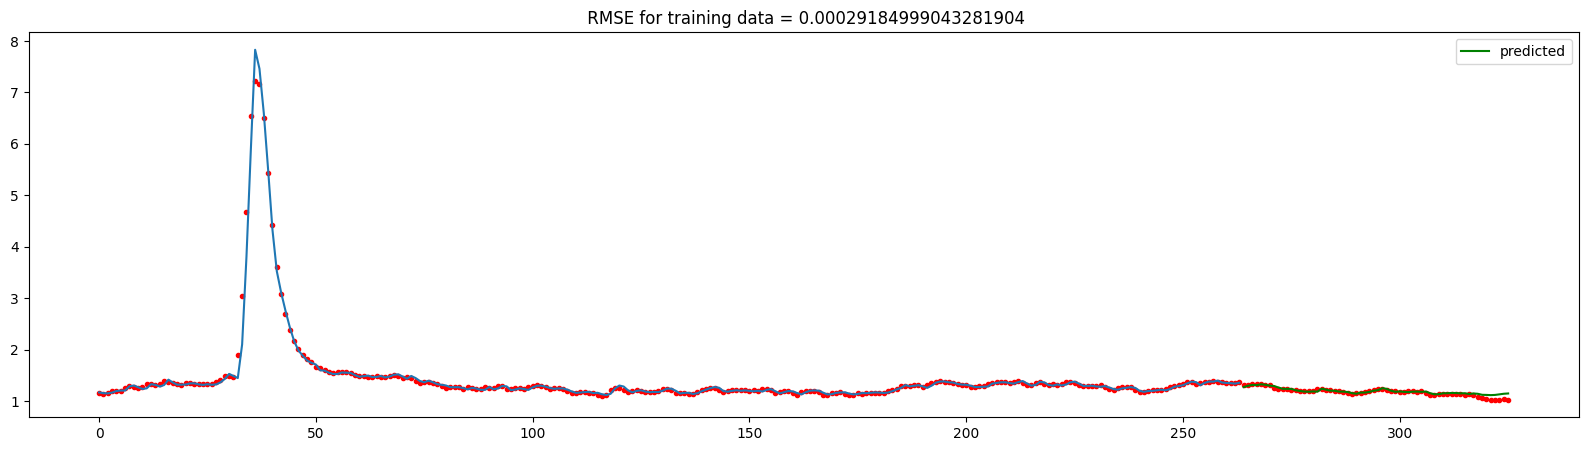

RMSE for testing data: 0.00011713332077559348


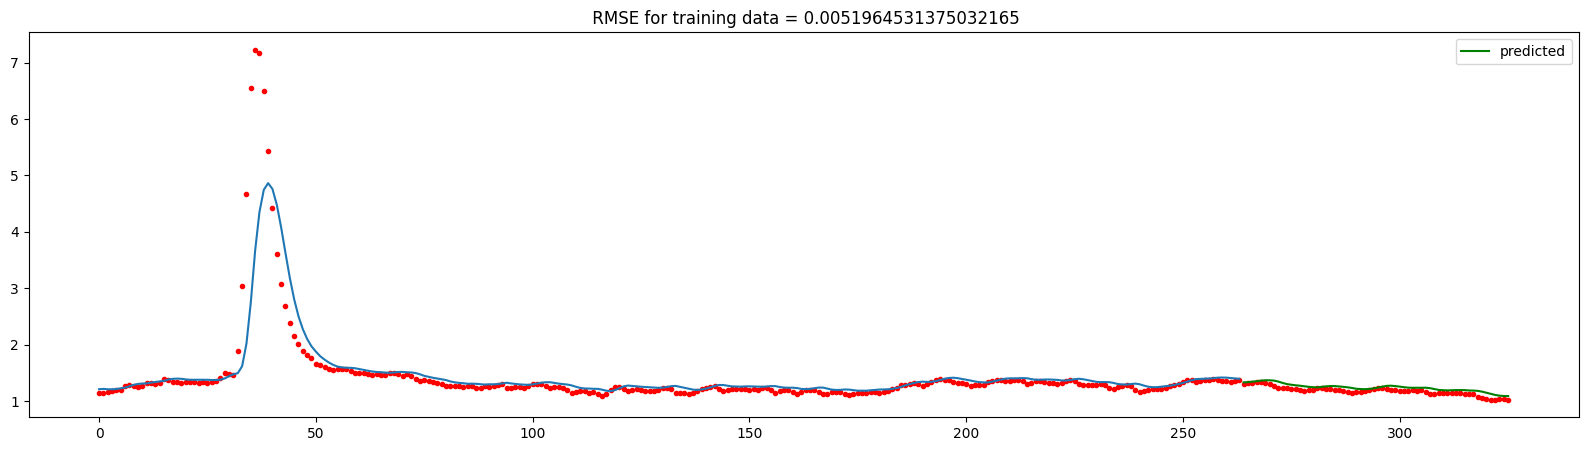

RMSE for testing data: 0.0004930022678239372


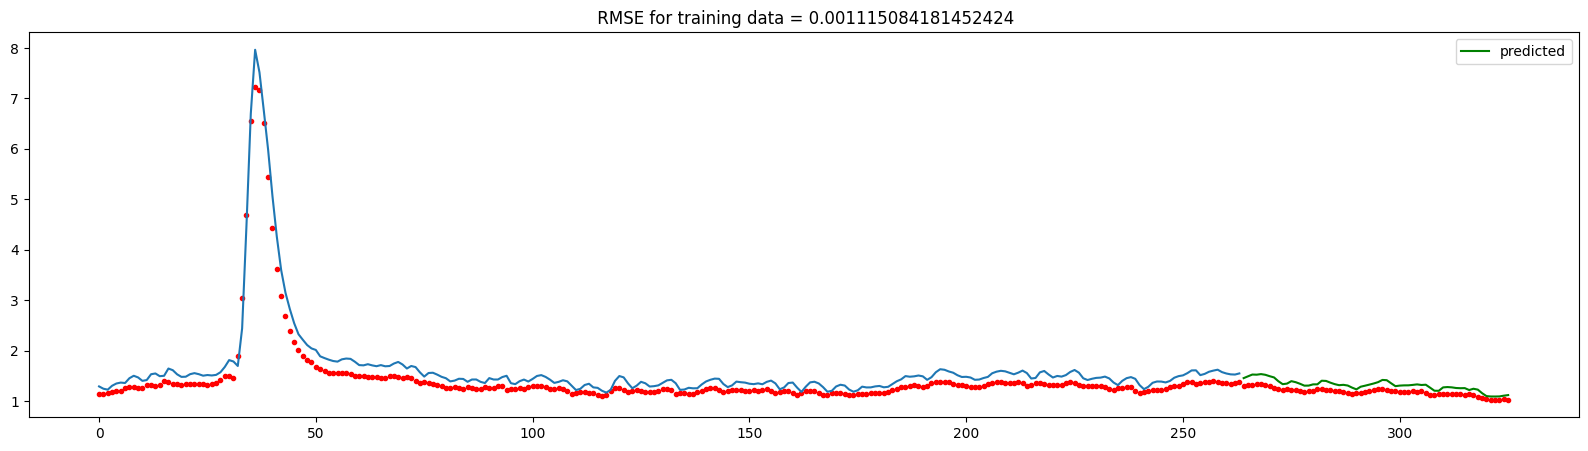

In [61]:
obj1.layers = 2
activ = ['relu','sigmoid','tanh'] # activation functions
for e in activ:
    obj1.actfun = e
    obj1.do_it()

Effect of Hidden nodes

RMSE for testing data: 3.98730496943435e-05


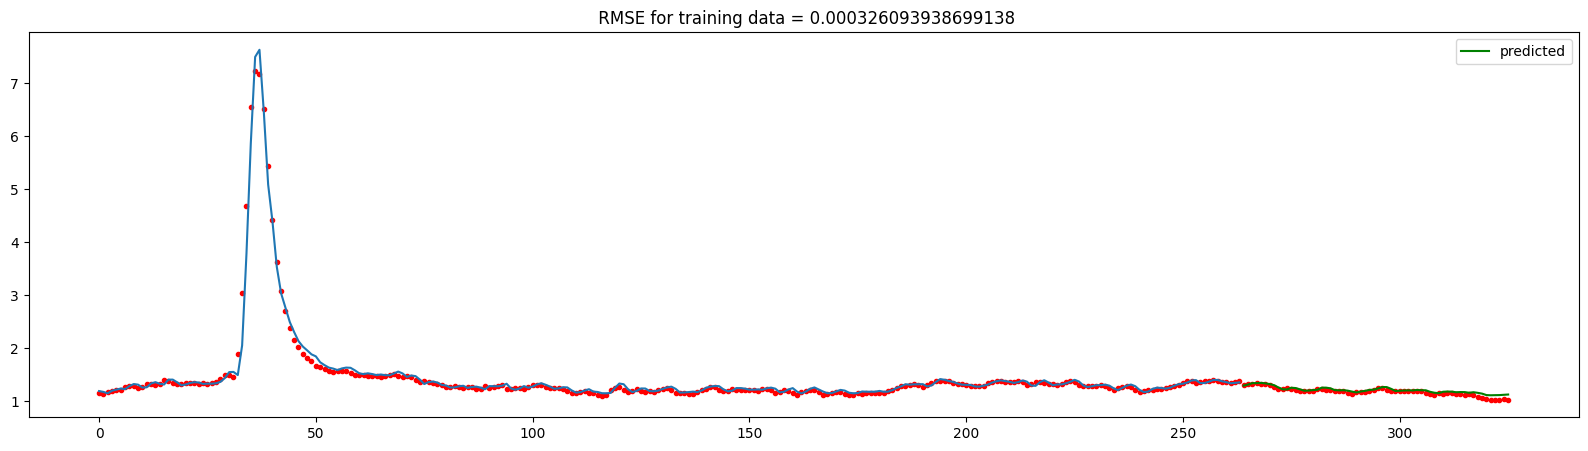

RMSE for testing data: 1.5777075603600476e-05


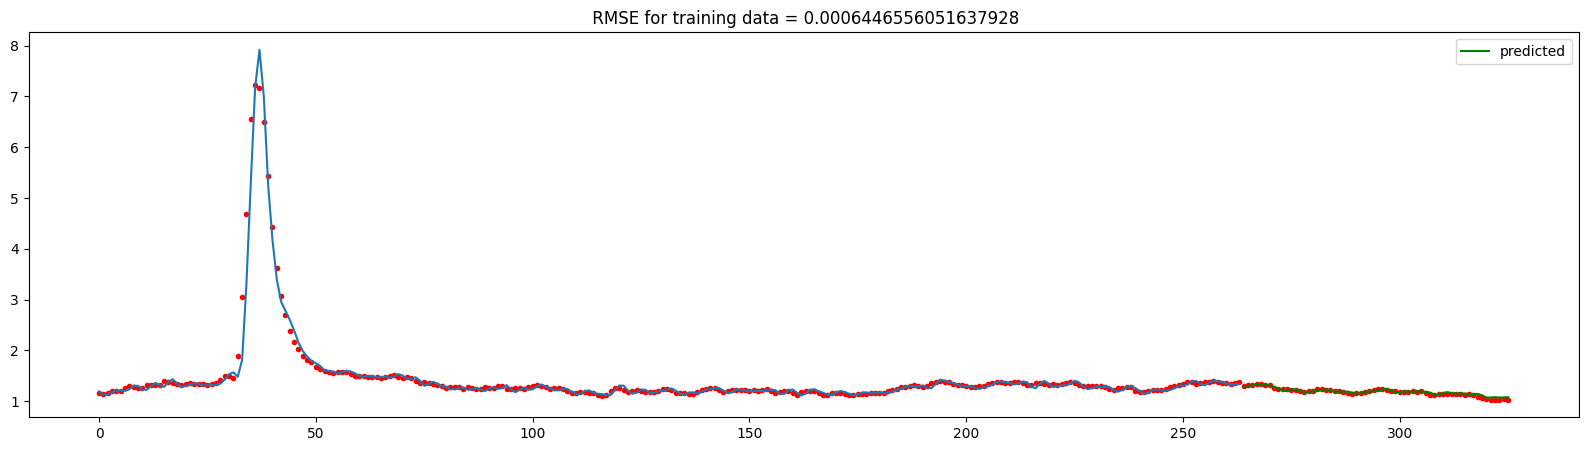

RMSE for testing data: 5.40873206654479e-05


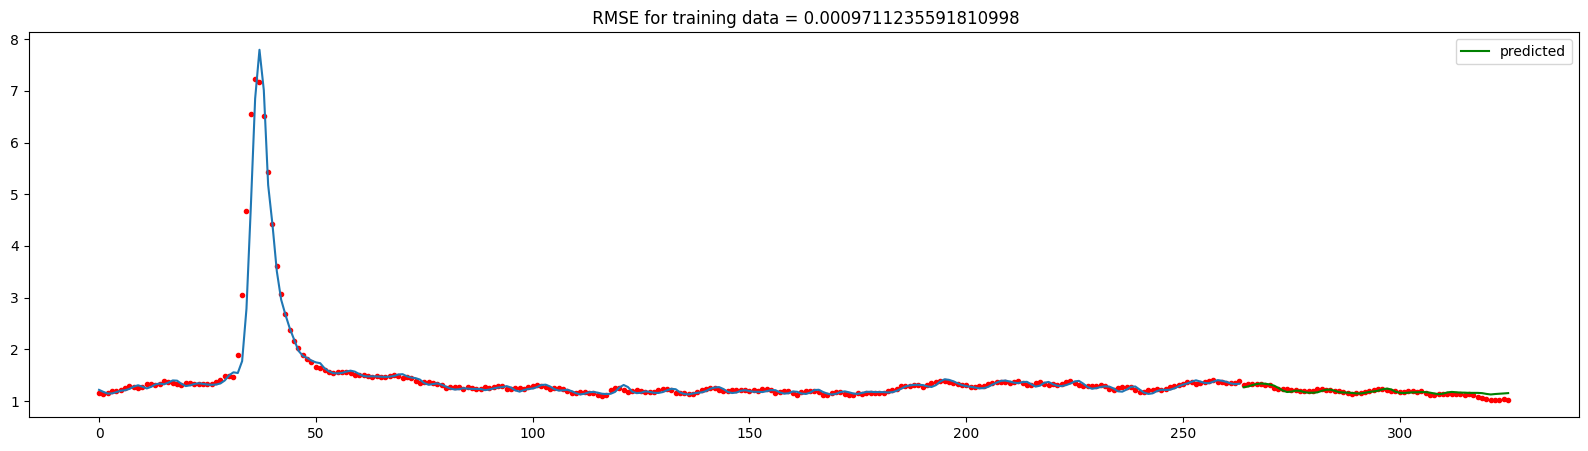

RMSE for testing data: 0.00011108586294020291


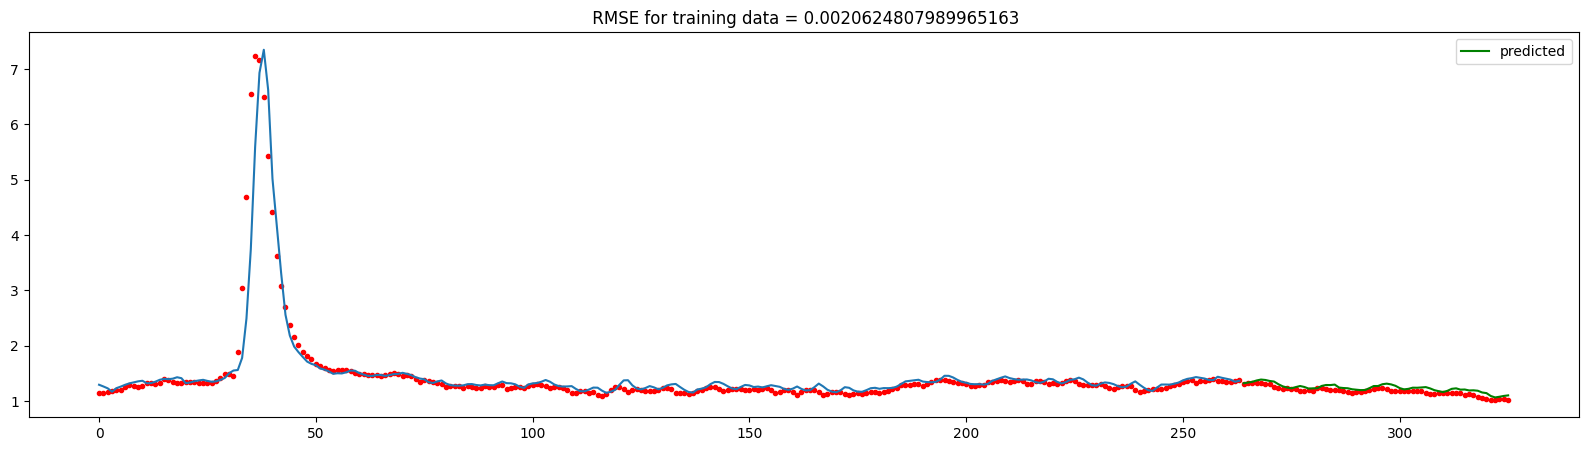

In [62]:
obj1.actfun = 'relu'
nodes = [20,16,12,8,4] # hidden nodes
for q in range(len(nodes)-1):
    obj1.nodes = nodes[q:q+2]
    obj1.do_it()

Effect of training size

RMSE for testing data: 0.0024009997277081464


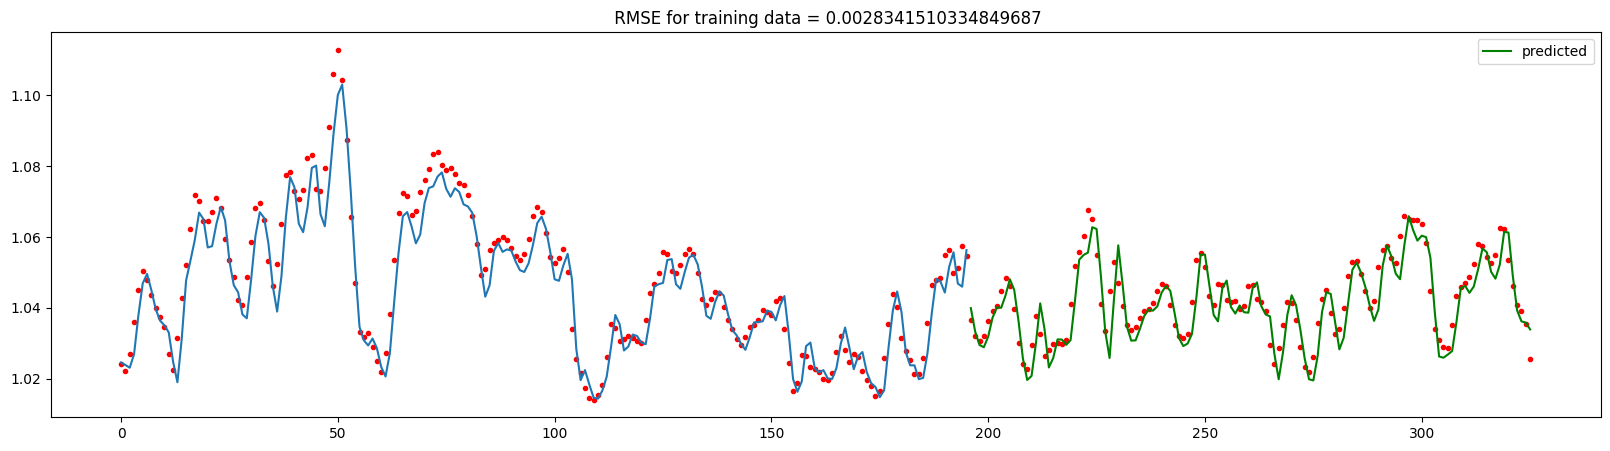

RMSE for testing data: 0.0016740772204196259


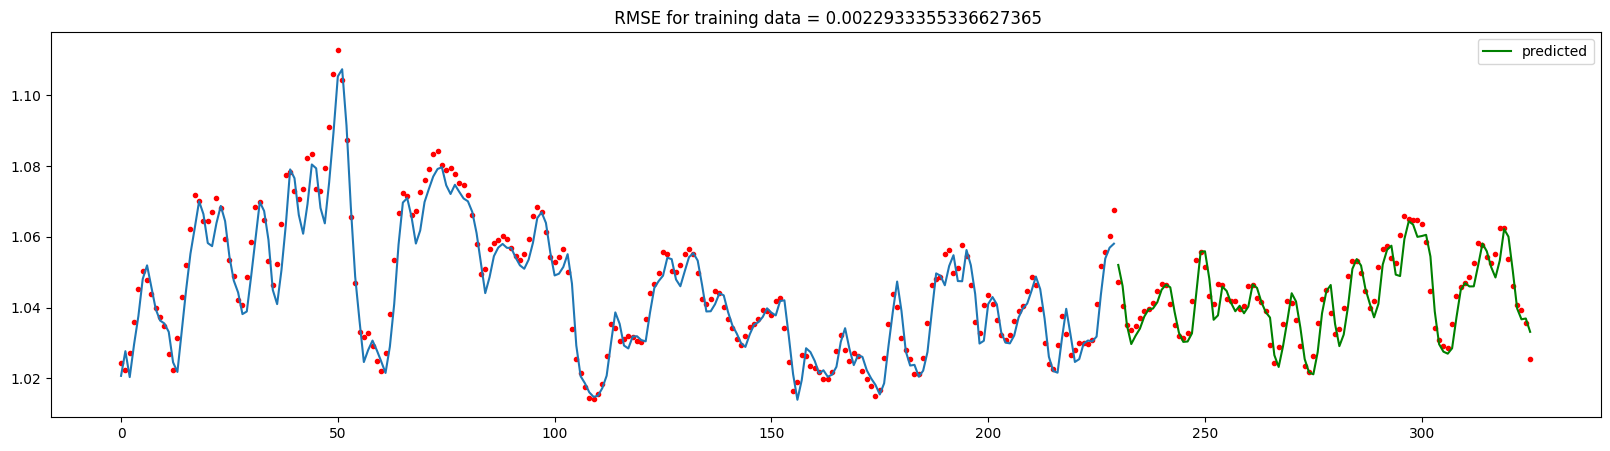

RMSE for testing data: 0.0027435322158451654


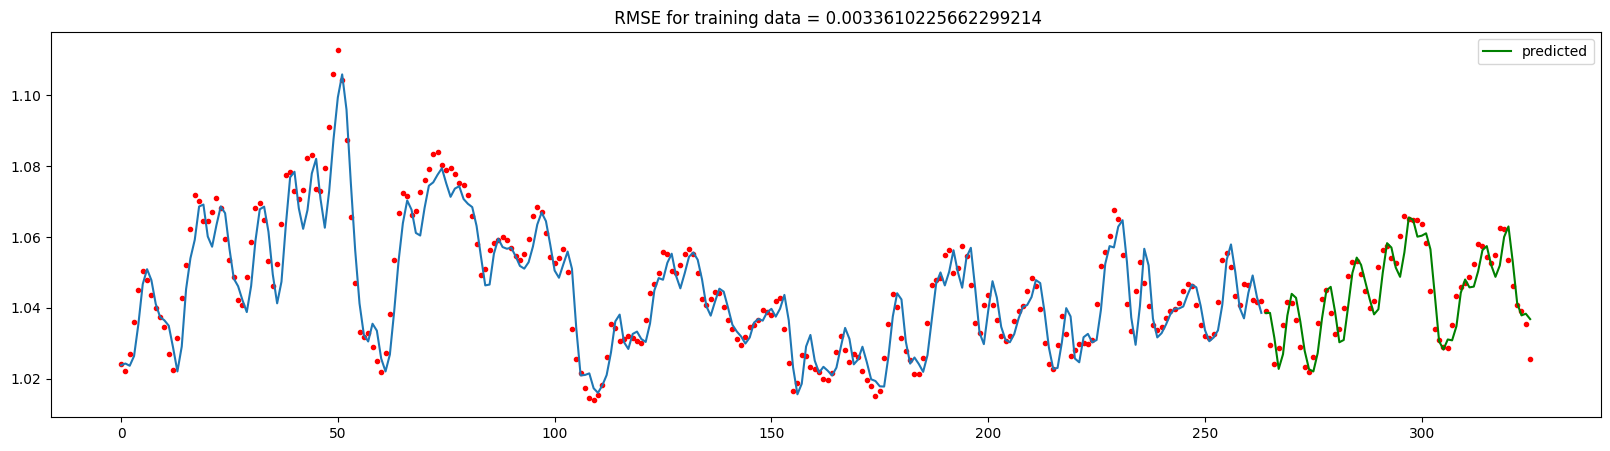

RMSE for testing data: 0.0018905543694120958


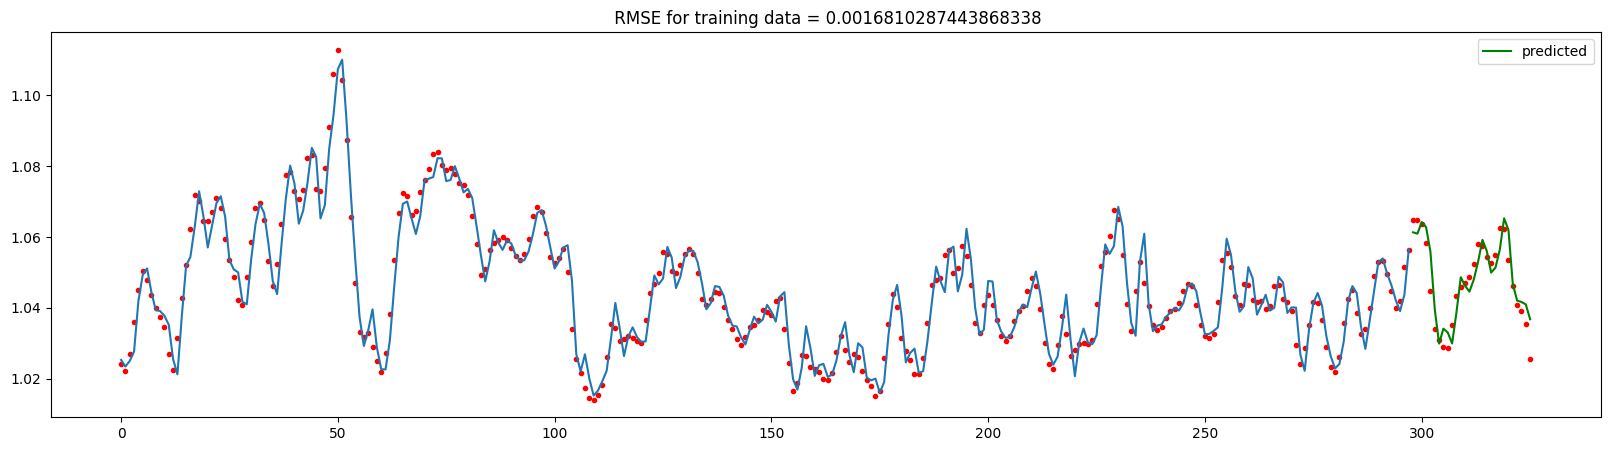

In [63]:
obj2 = sys('cluster16') 

trainers = [0.6,0.7,0.8,0.9] # training size
for i in trainers:
    obj2.train_size = i
    obj2.do_it()

Effect of window size

RMSE for testing data: 0.00241900820673806


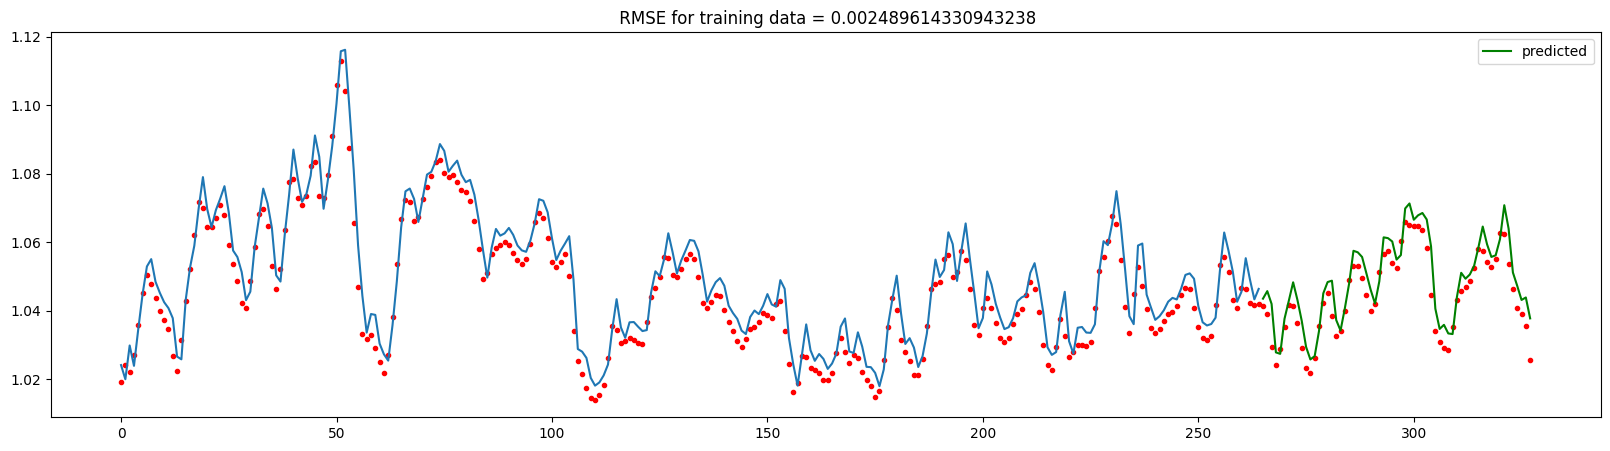

RMSE for testing data: 0.0015894051115356257


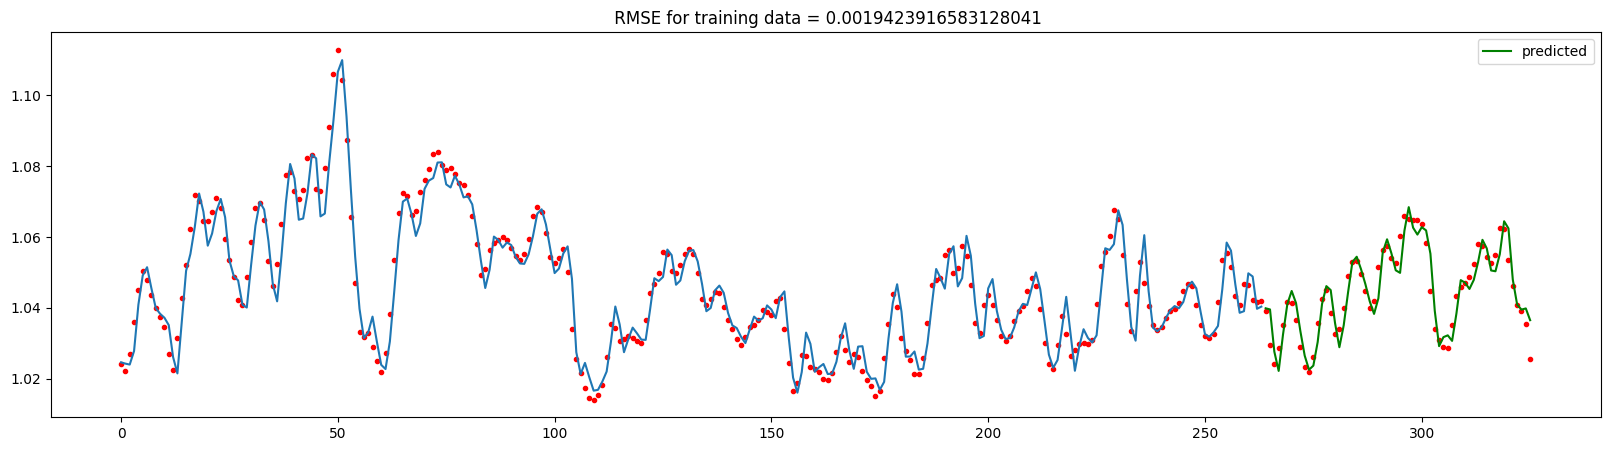

RMSE for testing data: 0.0014164831237814136


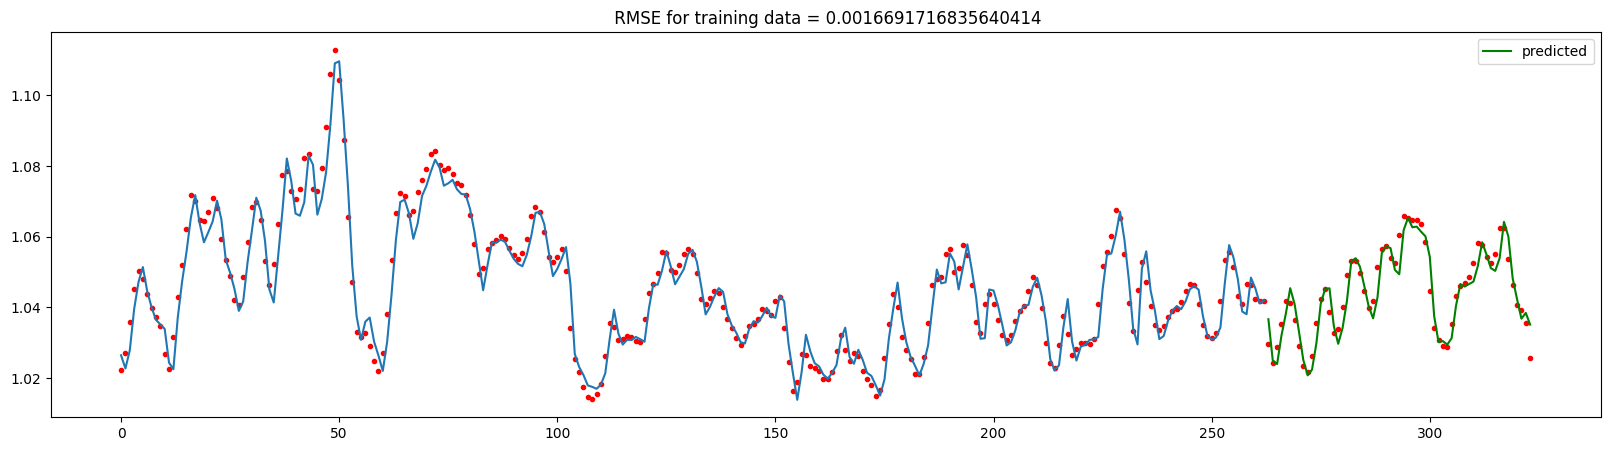

RMSE for testing data: 0.002047469664310472


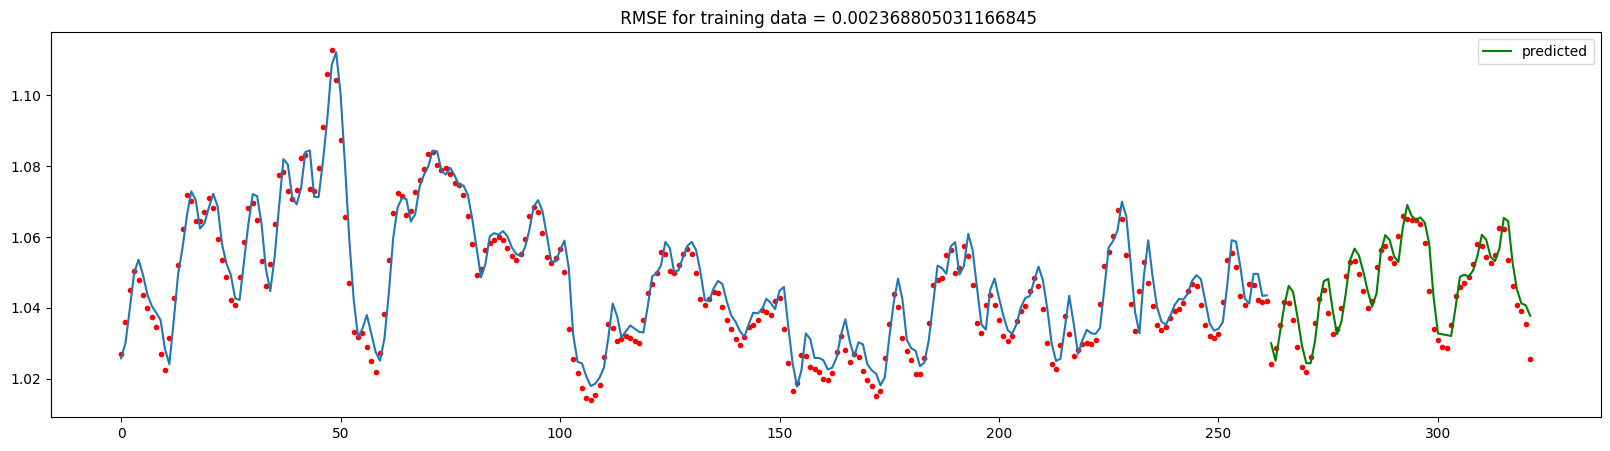

In [64]:

obj2.train_size = 0.8
seq_sizes = [4,5,6,7] # window size
for j in seq_sizes:
    obj2.seq_size = j
    obj2.do_it()

Effect of hidden layers

RMSE for testing data: 0.0023884559409515535


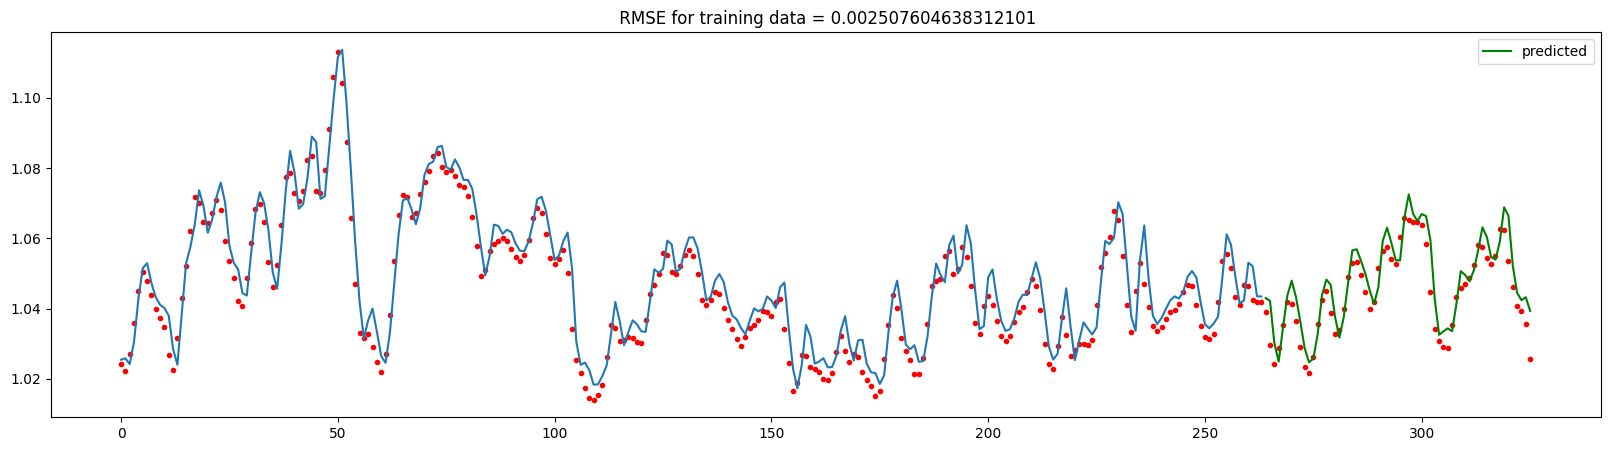

RMSE for testing data: 0.0018353506648080987


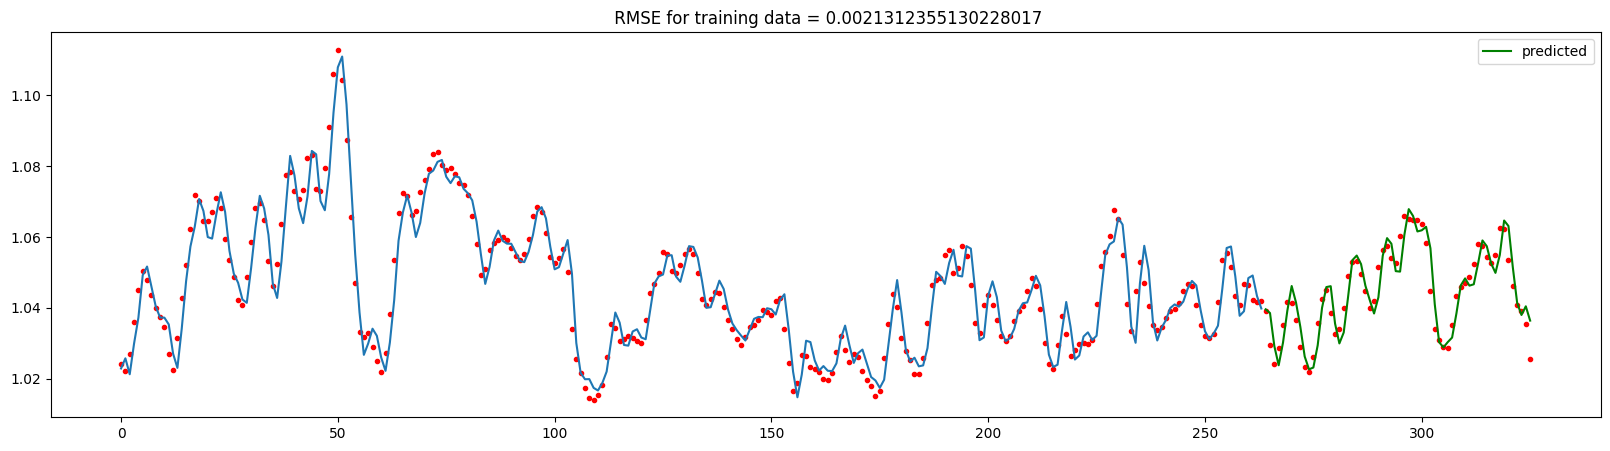

RMSE for testing data: 0.0015063678478123078


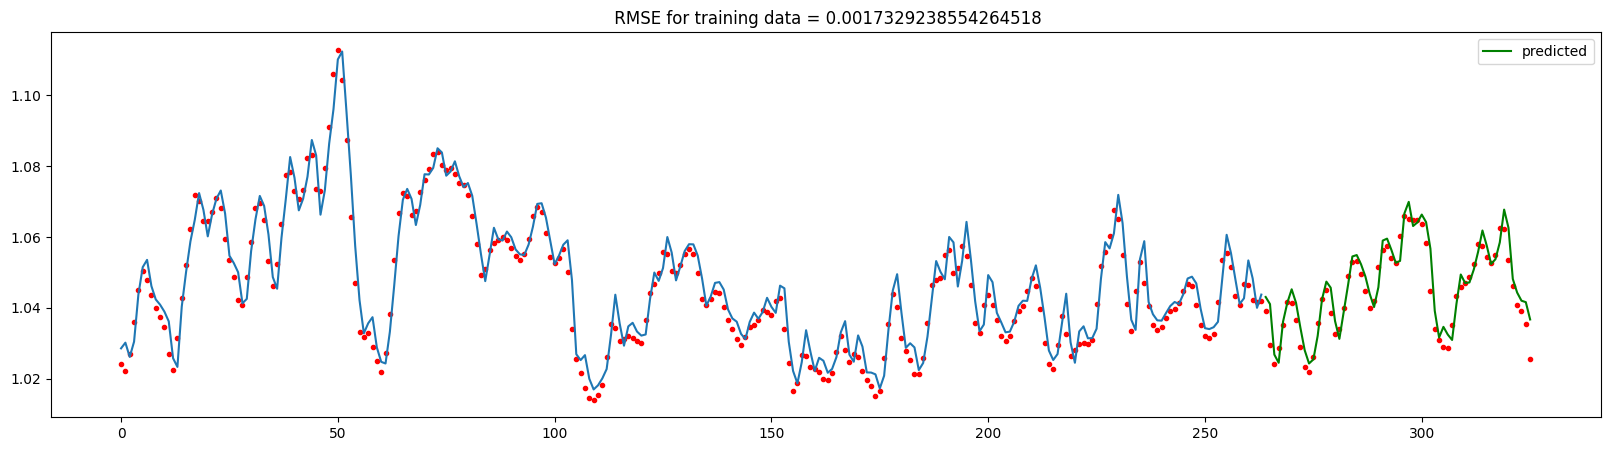

RMSE for testing data: 0.0027051566742158652


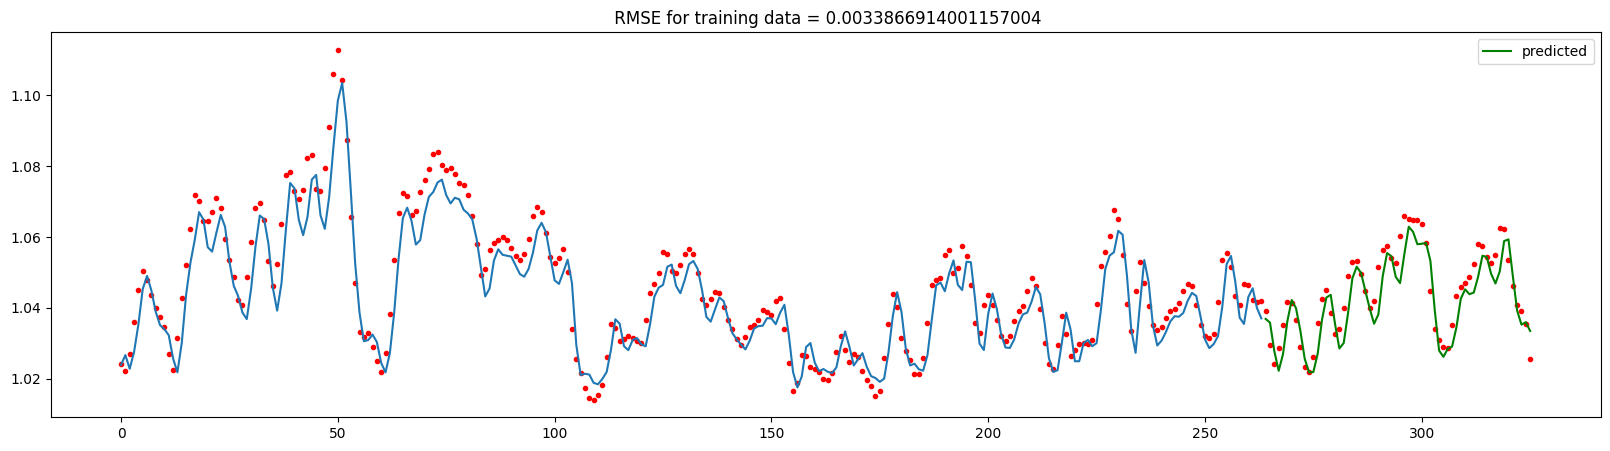

In [65]:

obj2.seq_size = 5
layers = [2,3,4,5] # layers
for s in layers:
    obj2.layers = s
    obj2.do_it()

Effect of activation functions

RMSE for testing data: 0.0019198971931261525


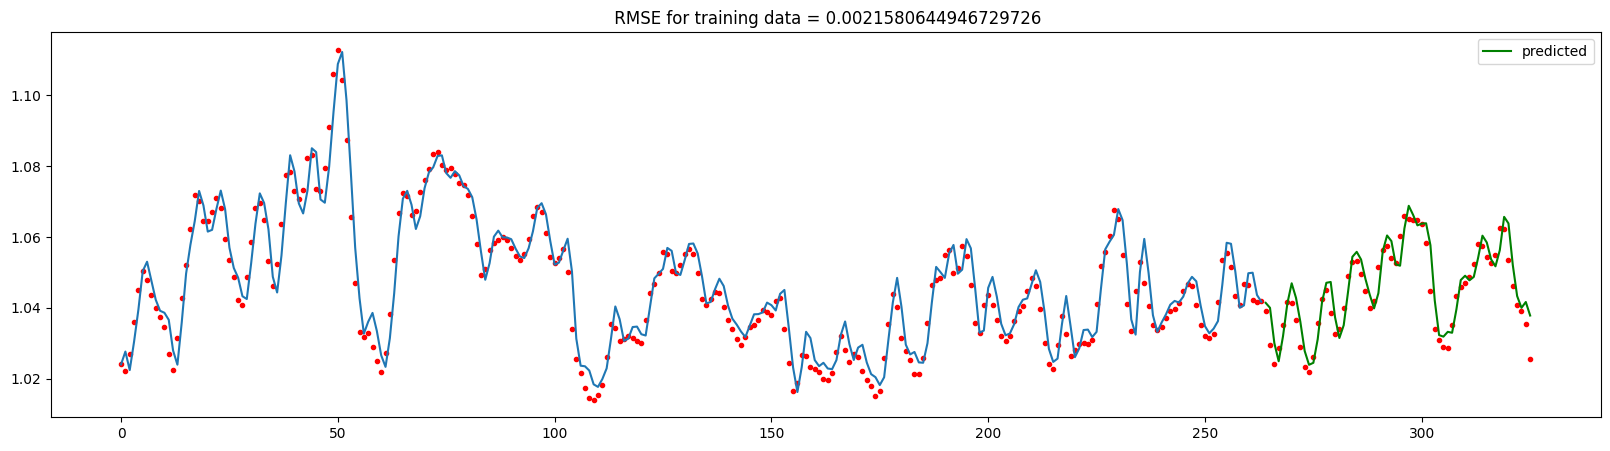

RMSE for testing data: 0.005448426333164346


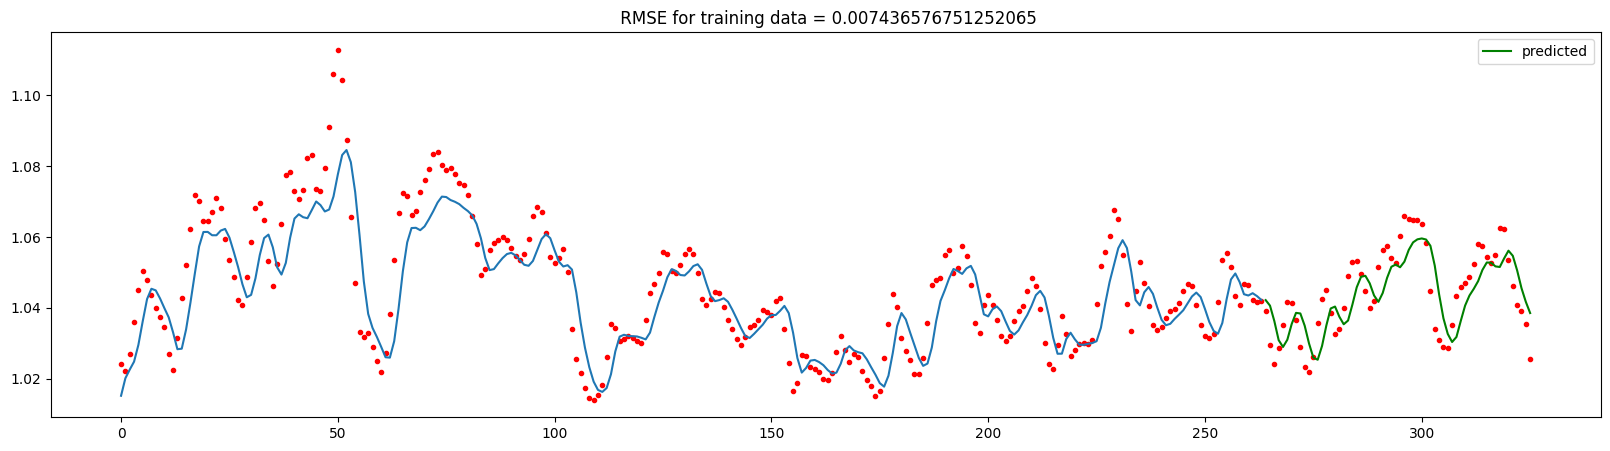

RMSE for testing data: 0.0012750449455126533


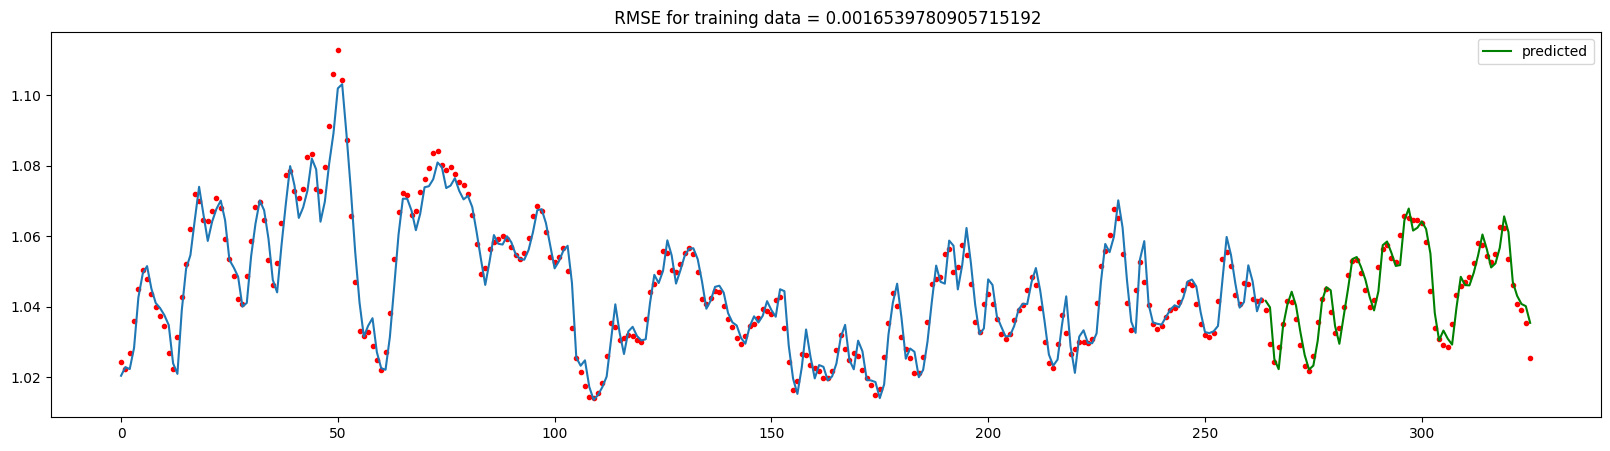

In [66]:

obj2.layers = 2
activ = ['relu','sigmoid','tanh'] # activation functions
for e in activ:
    obj2.actfun = e
    obj2.do_it()

Effect of hidden nodes

RMSE for testing data: 0.001144365154968456


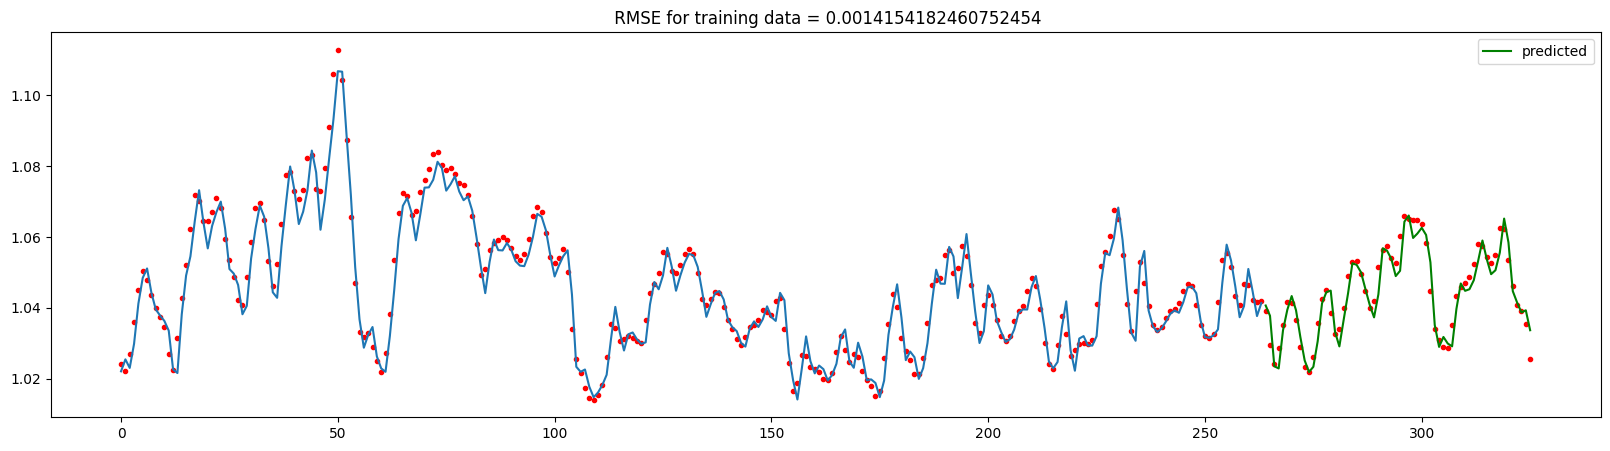

RMSE for testing data: 0.001403562841441628


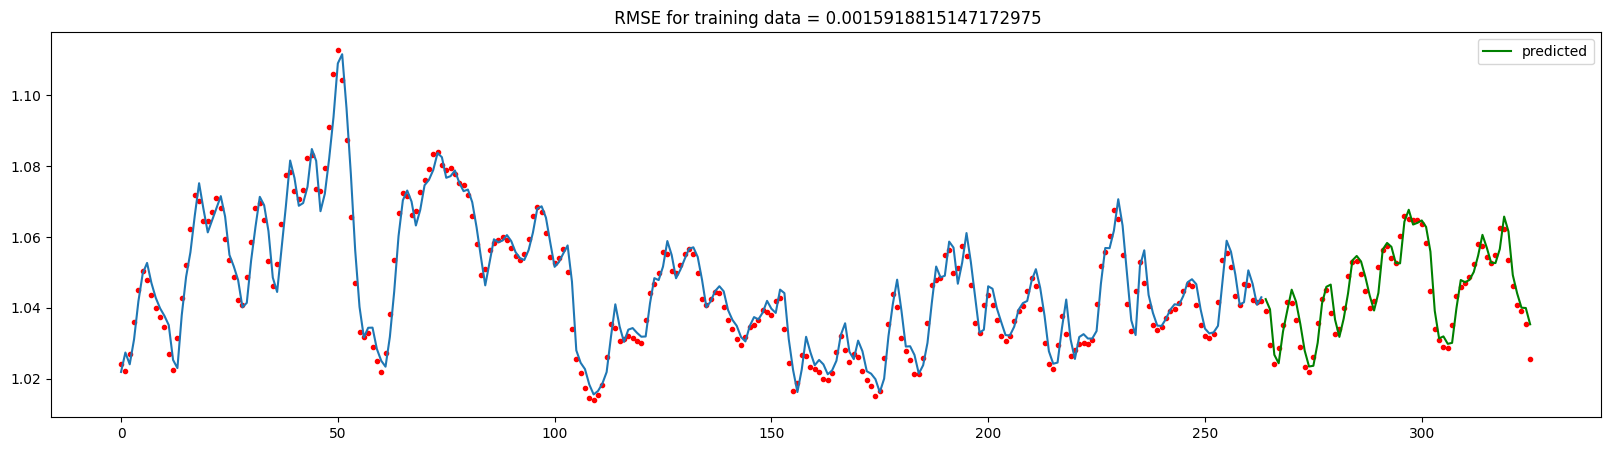

RMSE for testing data: 0.001296496611983861


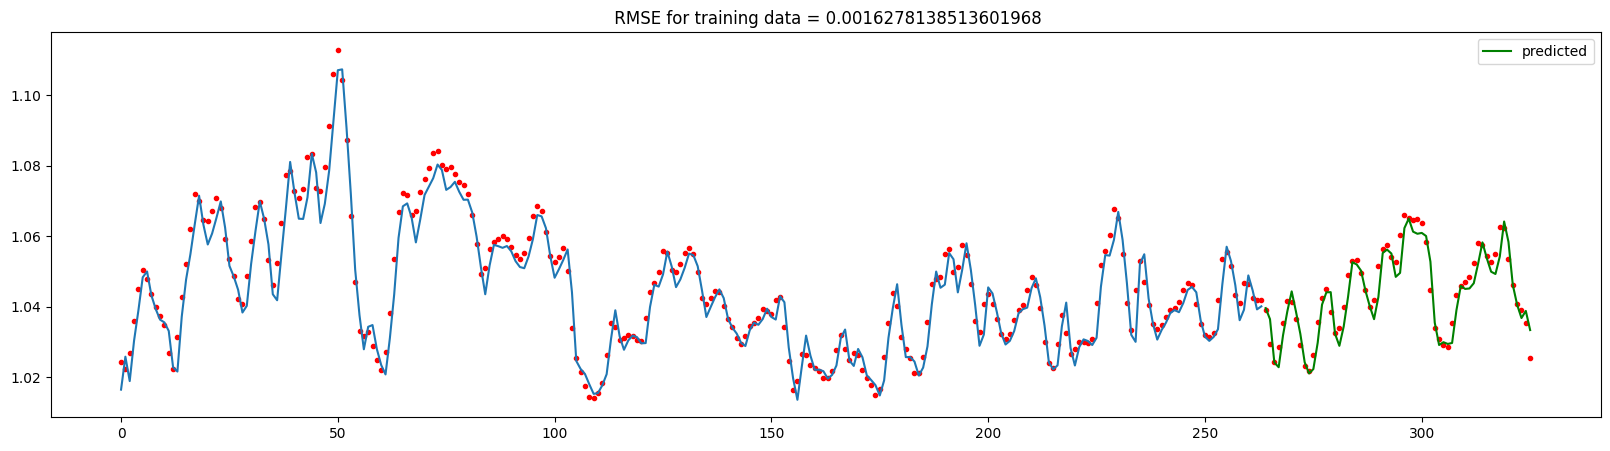

RMSE for testing data: 0.0029141969635514786


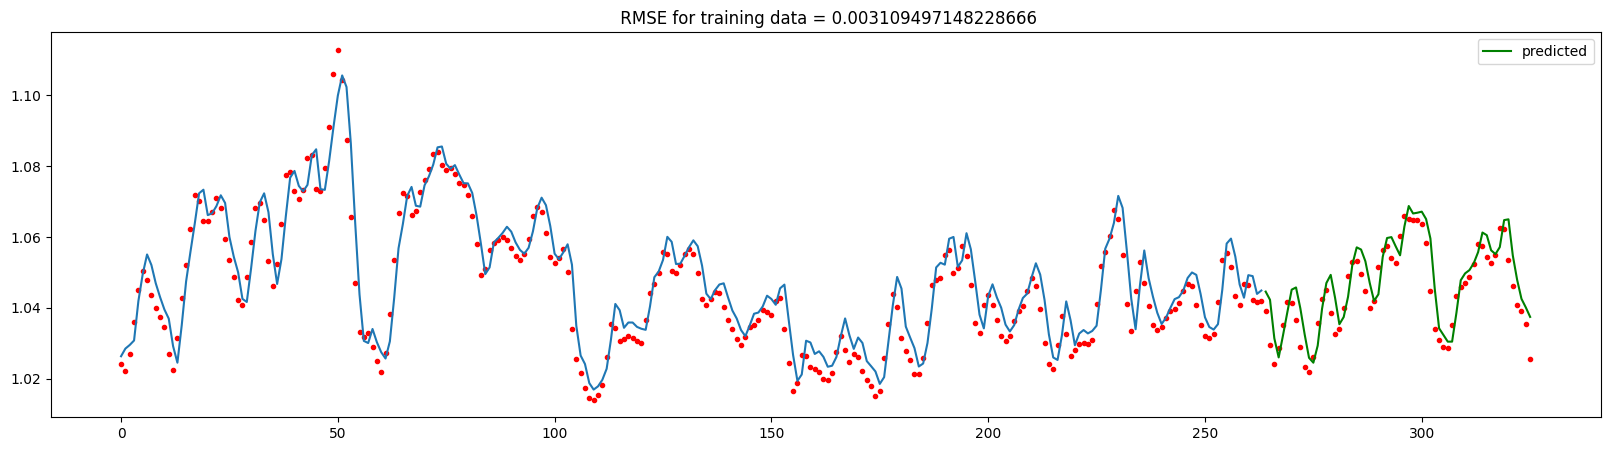

In [67]:

obj2.actfun = 'relu'
nodes = [20,16,12,8,4] # Hidden nodes
for q in range(len(nodes)-1):
    obj2.nodes = nodes[q:q+2]
    obj2.do_it()